In [1]:
import torchvision
import torchvision.transforms as transforms
import math
import matplotlib.pyplot as plt
import torch
import numpy as np
import PIL
import os
from sklearn.model_selection import train_test_split
import pandas

c:\Users\pcsab\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\pcsab\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\detection\anchor_utils.py:63: UserWarning: Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:68.)
  device: torch.device = torch.device("cpu"),


In [1]:
# import zipfile

# with zipfile.ZipFile('../data/img_align_celeba.zip', 'r') as zip_ref:
#     zip_ref.extractall('../data')

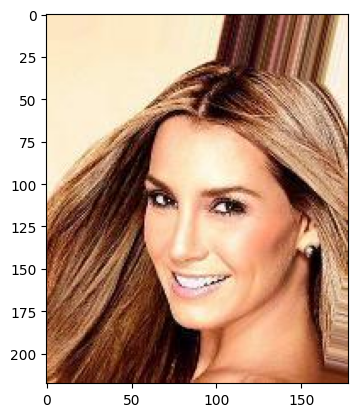

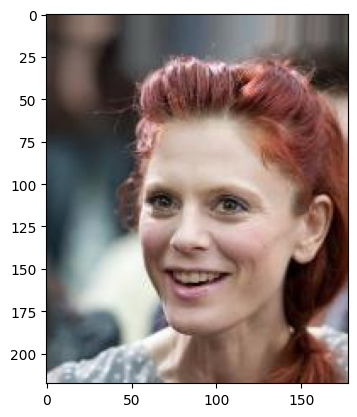

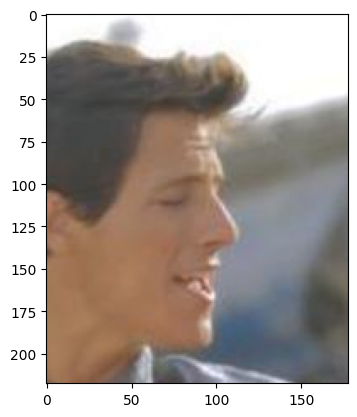

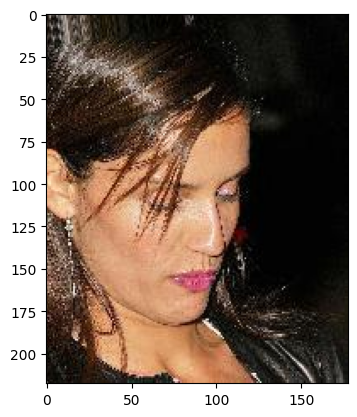

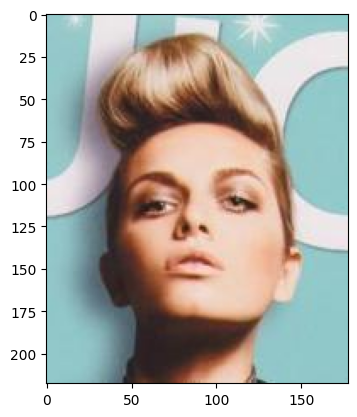

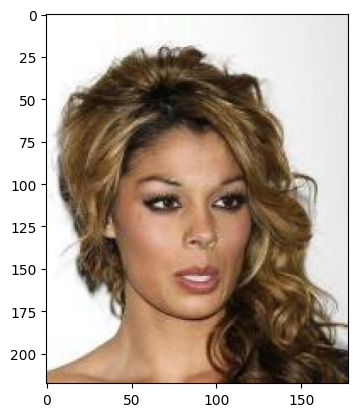

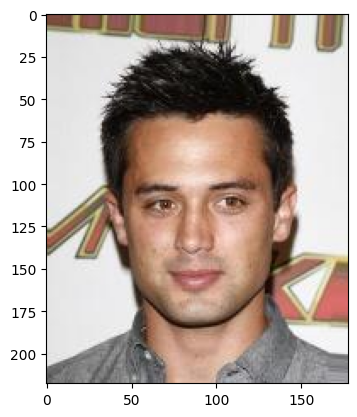

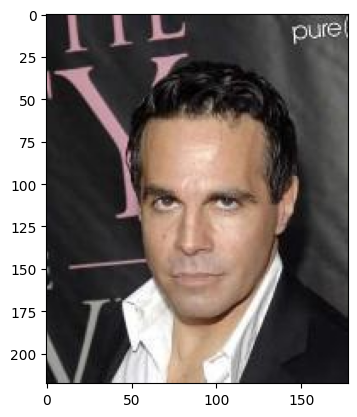

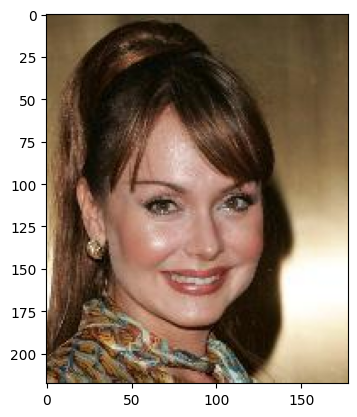

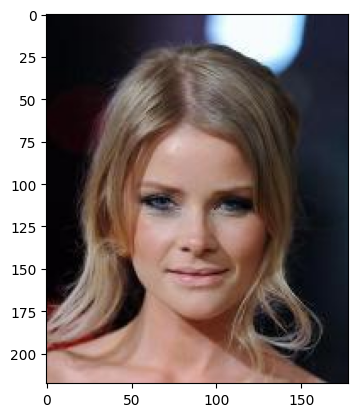

In [3]:
image_folder = '../data/dataset/train'
image_files = os.listdir(image_folder)
images = []

for i in range(10):  # Load 10 images
    image_path = os.path.join(image_folder, image_files[i])
    image = PIL.Image.open(image_path)
    images.append(image)

    plt.imshow(image)
    plt.show()

In [16]:
class Config():
  #image default crop size : 218*178
  image_target_size = (32,32)
  batch_size = 64

In [8]:
transform = transforms.Compose([
    transforms.Resize(Config.image_target_size),
    transforms.ToTensor(), 
    transforms.Lambda(lambda t: (t * 2) - 1),
])

reverse_transform = transforms.Compose([
    transforms.Lambda(lambda t: (t + 1) / 2),
    transforms.Lambda(lambda t: t.permute(1, 2, 0)),
    transforms.Lambda(lambda t: t * 255.),
    transforms.Lambda(lambda t: t.cpu().numpy().astype(np.uint8)),
    transforms.ToPILImage(),
])
    

dataset = torchvision.datasets.ImageFolder(root='../data/dataset', transform=transform)

# x_train, x_test, _, _ = train_test_split(dataset, test_size=0.2, )
# dataloader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True)

In [11]:
from torch.utils.data import Dataset


class DDPMImageDataset(Dataset):
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform
        self.image_paths = [os.path.join(root, img) for img in os.listdir(root) if img.endswith(('.png', '.jpg', '.jpeg'))]
    
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = PIL.Image.open(img_path).convert('RGB')
        
        if self.transform:
            image = self.transform(image)
        
        label = 0
        return image, label

In [14]:
train_dataset = DDPMImageDataset(root='../data/dataset/train', transform=transform)
validation_dataset = DDPMImageDataset(root='../data/dataset/validation', transform=transform)
test_dataset = DDPMImageDataset(root='../data/dataset/test', transform=transform)

In [17]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=Config.batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=Config.batch_size, shuffle=False)
val_loader = DataLoader(validation_dataset, batch_size=Config.batch_size, shuffle=False)

In [19]:
for batch in train_loader:
    print(batch[0])
    break

RuntimeError: Numpy is not available